In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mini_project/train3.csv',encoding='ISO-8859-1')

In [ ]:
df.info()#is used to get consice summary of pandas dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
df.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [ ]:
df.shape#is used to obtain the Dimensions or shape of a Pandas DataFrame

(99989, 3)

In [ ]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')>

In [ ]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [ ]:
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))

In [ ]:
print(count)

[56457, 43532]


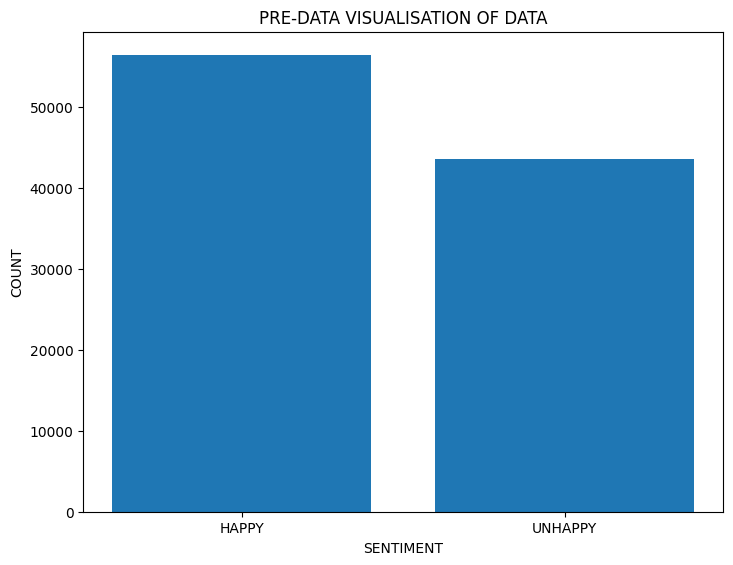

In [ ]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [ ]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1

In [ ]:
df[['Preprocessed_1']]

,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2

In [ ]:
df[['Preprocessed_2']]

,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [ ]:
#no need
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3

In [ ]:
df[['Preprocessed_3']]

,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df["Preprocessed_3"].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4

In [ ]:
df[['Preprocessed_4']]

,Preprocessed_4
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweets time se...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [ ]:
df.shape

(99957, 8)

In [ ]:
df[['Preprocessed_5']]

,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [ ]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['Sentiment']=df['Sentiment']

In [ ]:
df2

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99984,cupcake seems like repeating problem hope able...,0
99985,cupcake arrrr replied different tweet time see...,1
99986,cupcake ya thought,0
99987,cupcake dollie yes yes glad fun,1


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()        #Loading tfidf function to our variable

In [ ]:
#Fitting and transforming the vectorizer to our data
x=df2['Clean Tweets']
# print(df2)
vectorizer.fit(x)

x=vectorizer.transform(x)
print(x[0])   #Transforming all the text data and gives corresponding tf-idf value

  (0, 77827)	0.3785826629963296
  (0, 53559)	0.3951112112588359
  (0, 13989)	0.8369959964158628


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,df2['Sentiment'],test_size=0.20,train_size=0.80)

In [ ]:
x_train.shape

(79965, 92259)

In [ ]:
x_test.shape

(19992, 92259)

In [ ]:
y_train.shape

(79965,)

In [ ]:
y_test.shape

(19992,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
import functools
import sys
import matplotlib.pyplot as plt
import numpy as np

LOGISTIC REGRESSION

In [ ]:
#LOGISTIC REGRESSION
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
linear_model_result = cross_validation(lrc,x_train,y_train, 5)

In [ ]:
lrc.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred2=lrc.predict(x_test)

In [ ]:
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

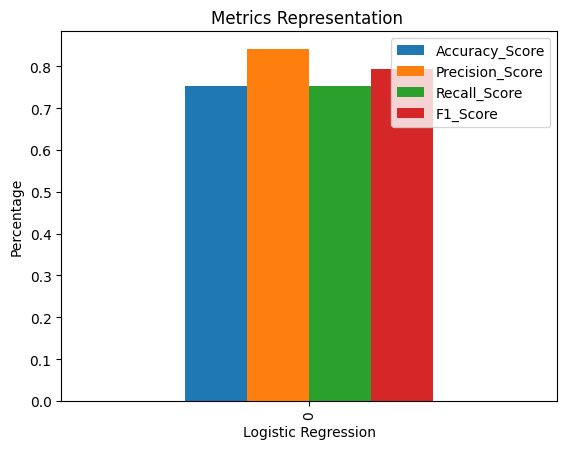

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[lrc1],'Precision_Score':[lrc2],'Recall_Score':[lrc3],'F1_Score':[lrc4]})
g.plot(kind='bar')
plt.xlabel('Logistic Regression')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

Gradient Boost Machine

In [ ]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
linear_model_result = cross_validation(classifier_xg,x_train,y_train, 5)
classifier_xg.fit(x_train, y_train)

y_pred_xg = classifier_xg.predict(x_test)
xgb1=accuracy_score(y_pred_xg,y_test)
xgb2=precision_score(y_pred_xg,y_test)
xgb3=recall_score(y_pred_xg,y_test)
xgb4=f1_score(y_pred_xg,y_test)

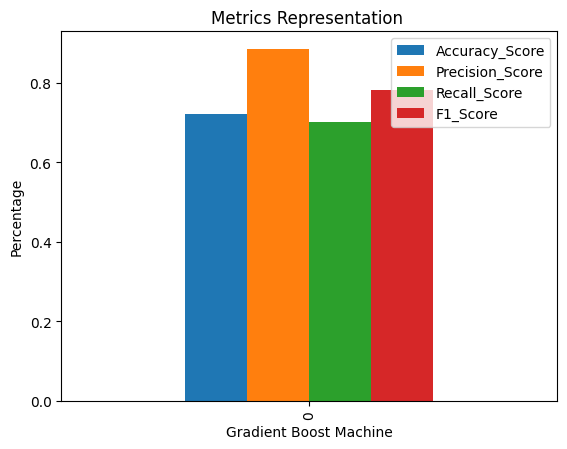

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[xgb1],'Precision_Score':[xgb2],'Recall_Score':[xgb3],'F1_Score':[xgb4]})
g.plot(kind='bar')
plt.xlabel('Gradient Boost Machine')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

In [ ]:
import keras.models

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/mini_project/model.pkl', 'wb') as files:
    pickle.dump(lrc, files)

NAIVE BAYES

In [ ]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
linear_model_result = cross_validation(nb,x_train,y_train, 5)

In [ ]:
nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred3=nb.predict(x_test)

In [ ]:
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

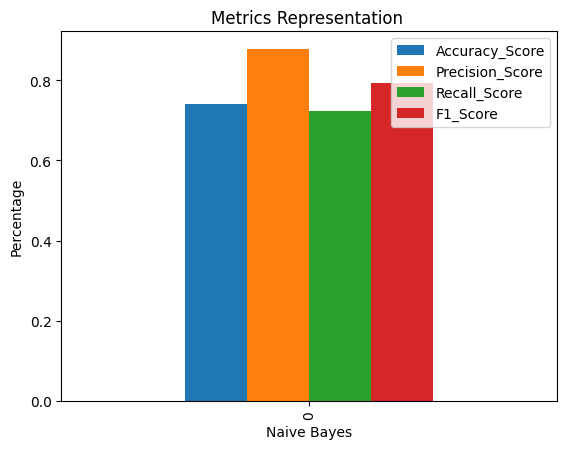

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[nb1],'Precision_Score':[nb2],'Recall_Score':[nb3],'F1_Score':[nb4]})
g.plot(kind='bar')
plt.xlabel('Naive Bayes')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

STOCHASTIC GRADIENT DESCENT

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge')
linear_model_result = cross_validation(sgd,x_train,y_train, 5)



In [ ]:
sgd.fit(x_train,y_train)



SGDClassifier()

In [ ]:
y_pred4=sgd.predict(x_test)

In [ ]:
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

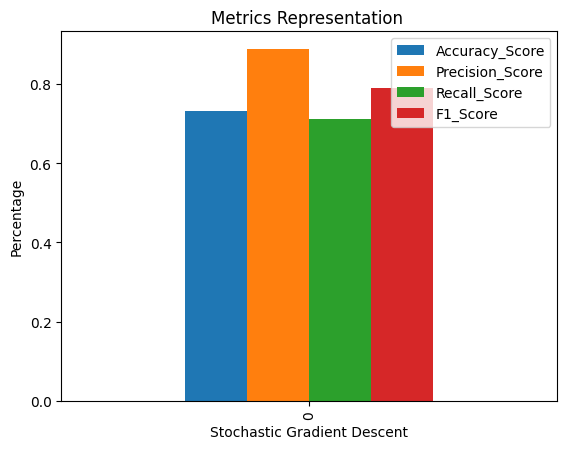

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[sgd1],'Precision_Score':[sgd2],'Recall_Score':[sgd3],'F1_Score':[sgd4]})
g.plot(kind='bar')
plt.xlabel('Stochastic Gradient Descent')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
linear_model_result = cross_validation(dt,x_train,y_train, 5)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred5=dt.predict(x_test)

In [ ]:
dt1=accuracy_score(y_pred5,y_test)
dt2=precision_score(y_pred5,y_test)
dt3=recall_score(y_pred5,y_test)
dt4=f1_score(y_pred5,y_test)

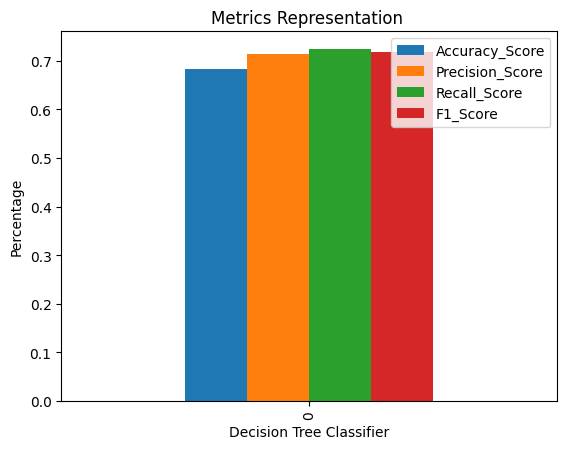

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[dt1],'Precision_Score':[dt2],'Recall_Score':[dt3],'F1_Score':[dt4]})
g.plot(kind='bar')
plt.xlabel('Decision Tree Classifier')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier()


In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred6=rfc.predict(x_test)

In [ ]:
rfc1=accuracy_score(y_pred6,y_test)
rfc2=precision_score(y_pred6,y_test)
rfc3=recall_score(y_pred6,y_test)
rfc4=f1_score(y_pred6,y_test)

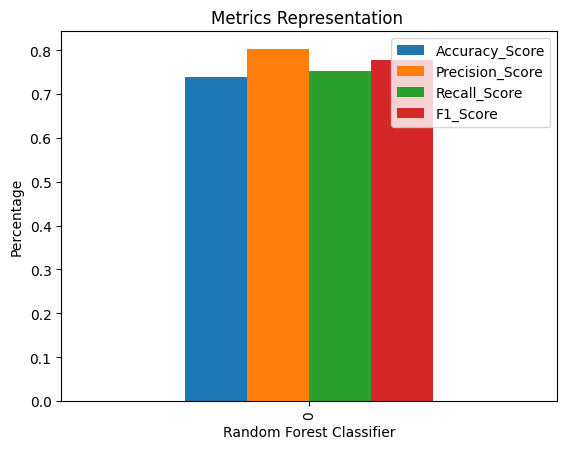

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[rfc1],'Precision_Score':[rfc2],'Recall_Score':[rfc3],'F1_Score':[rfc4]})
g.plot(kind='bar')
plt.xlabel('Random Forest Classifier')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()


In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred7=svm.predict(x_test)

In [ ]:
svm1=accuracy_score(y_pred7,y_test)
svm2=precision_score(y_pred7,y_test)
svm3=recall_score(y_pred7,y_test)
svm4=f1_score(y_pred7,y_test)

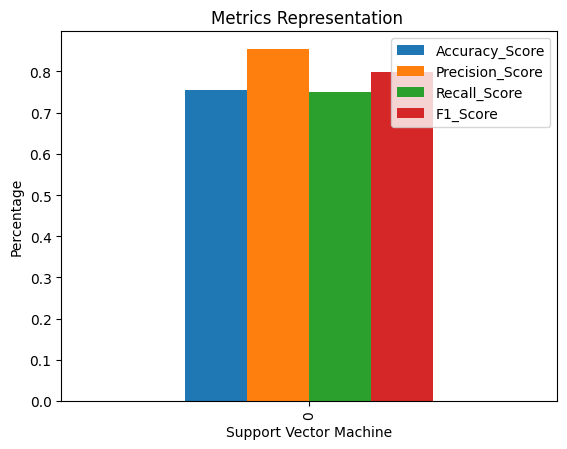

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[svm1],'Precision_Score':[svm2],'Recall_Score':[svm3],'F1_Score':[svm4]})
g.plot(kind='bar')
plt.xlabel('Support Vector Machine')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

VOTING CLASSIFIER

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
one=LogisticRegression(max_iter=250)
two=SGDClassifier()
three=SVC()
four=DecisionTreeClassifier()


In [ ]:
ens=VotingClassifier(estimators=[('Logistic',one),('SGD',two)],voting='soft')

In [ ]:
ens.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(max_iter=250)),
                             ('SGD', SGDClassifier())])

In [ ]:
ens_y_pred=ens.predict(x_test)

In [ ]:
ens1=accuracy_score(ens_y_pred,y_test)
ens2=precision_score(ens_y_pred,y_test)
ens3=recall_score(ens_y_pred,y_test)
ens4=f1_score(ens_y_pred,y_test)

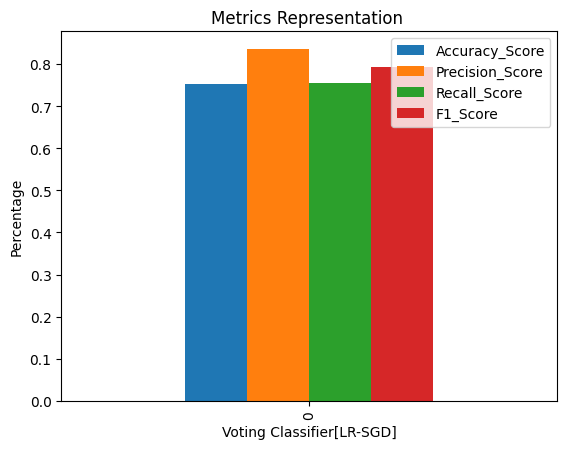

In [ ]:
g=pd.DataFrame({'Accuracy_Score':[ens1],'Precision_Score':[ens2],'Recall_Score':[ens3],'F1_Score':[ens4]})
g.plot(kind='bar')
plt.xlabel('Voting Classifier[LR-SGD]')
plt.ylabel('Percentage')
plt.title('Metrics Representation ')
plt.show()

pip install pyvi

Text(0.5, 1.0, 'Representation of measures')

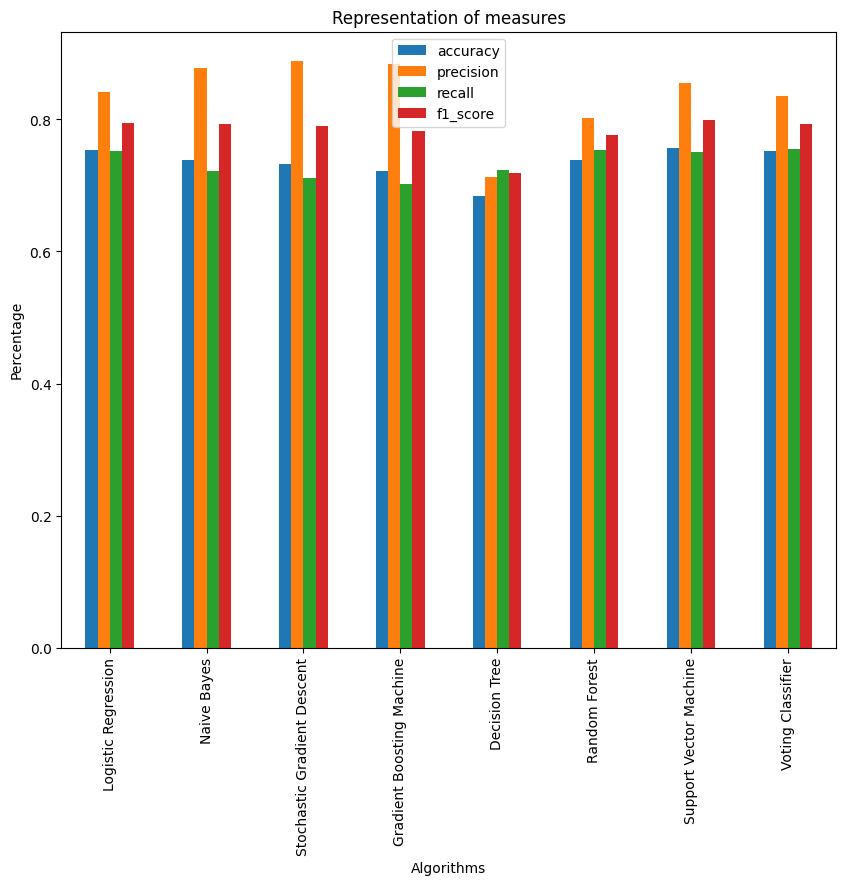

In [ ]:
graph=pd.DataFrame({"accuracy":[lrc1,nb1,sgd1,xgb1,dt1,rfc1,svm1,ens1],
                    "precision":[lrc2,nb2,sgd2,xgb2,dt2,rfc2,svm2,ens2],
                     "recall":[lrc3,nb3,sgd3,xgb3,dt3,rfc3,svm3,ens3],
                     "f1_score":[lrc4,nb4,sgd4,xgb4,dt4,rfc4,svm4,ens4]},
                  index=["Logistic Regression","Naive Bayes","Stochastic Gradient Descent","Gradient Boosting Machine","Decision Tree","Random Forest","Support Vector Machine","Voting Classifier"])
graph.plot(kind='bar',figsize=(10,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [ ]:
from prettytable import PrettyTable

Table = PrettyTable(["Algorithms", "Accuracy", "Precision", "Recall","F1_Score"])


Table.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
Table.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
Table.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])
Table.add_row(["GB", round(xgb1*100,1),round(xgb2*100,1),round(xgb3*100,1),round(xgb4*100,1)])
Table.add_row(["DT", round(dt1*100,1),round(dt2*100,1),round(dt3*100,1),round(dt4*100,1)])
Table.add_row(["RF", round(rfc1*100,1),round(rfc2*100,1),round(rfc3*100,1),round(rfc4*100,1)])
Table.add_row(["SVM", round(svm1*100,1),round(svm2*100,1),round(svm3*100,1),round(svm4*100,1)])
Table.add_row(["VC", round(ens1*100,1),round(ens2*100,1),round(ens3*100,1),round(ens4*100,1)])
print(Table)

+------------+----------+-----------+--------+----------+
| Algorithms | Accuracy | Precision | Recall | F1_Score |
+------------+----------+-----------+--------+----------+
|     NB     |   74.9   |    73.8   |  77.9  |   74.8   |
|     LR     |   75.7   |    81.7   |  81.7  |   79.5   |
|    SGD     |   75.3   |    78.8   |  75.2  |   79.0   |
|     GB     |   73.7   |    71.6   |  78.9  |   75.6   |
|     DT     |   74.1   |    73.8   |  76.8  |   75.9   |
|     RF     |   73.9   |    73.5   |  79.0  |   76.7   |
|    SVM     |   75.6   |    75.5   |  80.0  |   77.7   |
|     VC     |   77.9   |    77.6   |  83.7  |   80.8   |
+------------+----------+-----------+--------+----------+


In [ ]:
!pip install facebook_page_scraper
!pip install pyopenssl==22.0.0
!pip3 install cryptography==38.0.4
!apt-get update
!apt install chromium-chromedriver
! apt install firefox  xvfb > /dev/null
! pip3 install  pyvirtualdisplay selenium webdriver_manager  > /dev/null



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [ ]:
from facebook_page_scraper import Facebook_scraper
page_name = "metaai"
posts_count = 15
browser = "firefox"
proxy = "IP:PORT" #if proxy requires authentication then user:password@IP:PORT
timeout = 600 #600 seconds
headless = True
meta_ai = Facebook_scraper(page_name, posts_count, browser, proxy=proxy, timeout=timeout, headless=headless)
print(meta_ai)

In [ ]:
json_data = meta_ai.scrap_to_json()
print(json_data)

2023-05-06 15:13:56,452 - facebook_page_scraper.driver_initialization - INFO - Using: IP:PORT
INFO:facebook_page_scraper.driver_initialization:Using: IP:PORT
[WDM] - Driver [/root/.wdm/drivers/geckodriver/linux64/v0.33.0/geckodriver] found in cache
INFO:WDM:Driver [/root/.wdm/drivers/geckodriver/linux64/v0.33.0/geckodriver] found in cache


{"pfbid0vjEnVRrGftxxbTNF3qAKHZUREfQdUXZcpbUxjYkGfBRxnFXdt9QA2XYm8hW5mKm9l": {"name": "Meta AI", "shares": 0, "reactions": {"likes": 95, "loves": 14, "wow": 0, "cares": 0, "sad": 0, "angry": 0, "haha": 0}, "reaction_count": 109, "comments": 0, "content": "Self-supervised learning, or \"the dark matter of intelligence\", is a key ingredient in many recent AI breakthroughs. In order to lower barriers and help democratize access to this important field of research, we released the SSL Cookbook, a practical guide for researchers working to navigate the intricacies of SSL research and contribute to this important space.We're excited to offer this resource for the community to help more researchers access this space.", "posted_on": "2023-05-05T17:46:30.587412", "video": [], "image": ["https://scontent.xx.fbcdn.net/v/t39.2365-6/343195068_1321941345018091_9184153495097341883_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=ad8a9d&_nc_ohc=YH5NU5YCVoAAX9tG7t1&_nc_ht=scontent.xx&stp=c0.5000x0.5000f_dst-jpg_flfff

In [ ]:
print(type(json_data))

<class 'str'>


In [ ]:
import json
data = json.loads(json_data)
print(data)

{'pfbid0vjEnVRrGftxxbTNF3qAKHZUREfQdUXZcpbUxjYkGfBRxnFXdt9QA2XYm8hW5mKm9l': {'name': 'Meta AI', 'shares': 0, 'reactions': {'likes': 95, 'loves': 14, 'wow': 0, 'cares': 0, 'sad': 0, 'angry': 0, 'haha': 0}, 'reaction_count': 109, 'comments': 0, 'content': 'Self-supervised learning, or "the dark matter of intelligence", is a key ingredient in many recent AI breakthroughs. In order to lower barriers and help democratize access to this important field of research, we released the SSL Cookbook, a practical guide for researchers working to navigate the intricacies of SSL research and contribute to this important space.We\'re excited to offer this resource for the community to help more researchers access this space.', 'posted_on': '2023-05-05T17:46:30.587412', 'video': [], 'image': ['https://scontent.xx.fbcdn.net/v/t39.2365-6/343195068_1321941345018091_9184153495097341883_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=ad8a9d&_nc_ohc=YH5NU5YCVoAAX9tG7t1&_nc_ht=scontent.xx&stp=c0.5000x0.5000f_dst-jpg_flffff

In [ ]:
contents=[]
for id in data:
  # print(data[id]["content"])
  contents.append(data[id]["content"])


In [ ]:
print(contents)

['Self-supervised learning, or "the dark matter of intelligence", is a key ingredient in many recent AI breakthroughs. In order to lower barriers and help democratize access to this important field of research, we released the SSL Cookbook, a practical guide for researchers working to navigate the intricacies of SSL research and contribute to this important space.We\'re excited to offer this resource for the community to help more researchers access this space.', "RSVP to join us and get notified when we go live on May 18th @ 9am PT.AI Infra @Scale is a one-day virtual event featuring a range of speakers from Meta who will unveil the latest AI infrastructure investments and innovations powering Meta's products and services.", 'Do SSL models have a case of Déjà Vu?Read the paper  https://bit.ly/429QwpiIn a new paper, we performed a systematic study of the unintended memorization of image-specific information in SSL models. The work uncovered new, previously unknown risks in SSL models w

In [ ]:
import re
def removeatfromTweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)
    return tweet;
def preprocessTweets(tweets):
    output = []
    for tweet in tweets:
        output.append(removeatfromTweet(tweet)) ;
    return output ;


In [ ]:
import numpy as np
contents = preprocessTweets(contents);
print(contents)
contents = np.array(contents)

['Self supervised learning  or  the dark matter of intelligence   is key ingredient in many recent AI breakthroughs  In order to lower barriers and help democratize access to this important field of research  we released the SSL Cookbook practical guide for researchers working to navigate the intricacies of SSL research and contribute to this important space We re excited to offer this resource for the community to help more researchers access this space ', 'RSVP to join us and get notified when we go live on May 18th   9am PT AI Infra  is one day virtual event featuring range of speakers from Meta who will unveil the latest AI infrastructure investments and innovations powering Meta products and services ', 'Do SSL models have case of Déjà Vu Read the paper new paper  we performed systematic study of the unintended memorization of image specific information in SSL models  The work uncovered new  previously unknown risks in SSL models which we refer to as déjà vu memorization  This typ

In [ ]:
 contents_c = vectorizer.transform(contents)

In [ ]:
lc_pred = lrc.predict(contents_c)

In [ ]:
lc_pred = list(lc_pred)
print(lc_pred)
contents = list(contents)
print(contents)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['Self supervised learning  or  the dark matter of intelligence   is key ingredient in many recent AI breakthroughs  In order to lower barriers and help democratize access to this important field of research  we released the SSL Cookbook practical guide for researchers working to navigate the intricacies of SSL research and contribute to this important space We re excited to offer this resource for the community to help more researchers access this space ', 'RSVP to join us and get notified when we go live on May 18th   9am PT AI Infra  is one day virtual event featuring range of speakers from Meta who will unveil the latest AI infrastructure investments and innovations powering Meta products and services ', 'Do SSL models have case of Déjà Vu Read the paper new paper  we performed systematic study of the unintended memorization of image specific information in SSL models  The work uncovered new  previously unknown risks in SSL models which

In [ ]:
from prettytable import PrettyTable

columns = ["SentimentText", "Output"]

myTable = PrettyTable()

myTable.add_column(columns[0],contents);
myTable.add_column(columns[1],lc_pred);
print(myTable)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
text=np.array(['Today was good '])
text_vector=vectorizer.transform(text)
lrcop=lrc.predict(text_vector)
print(lrcop)

[1]
